## 作業

1. 請將 Epochs 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

## 參考資料

如何減少 Overfitting 的發生：

1. 使用更多的訓練資料。
2. 使用 K-fold cross validation，找到一組參數可以在多組不同的 validation 上得到相似的結果。
3. 減少 Features(參數) 的使用量，避免參數比潛在組合更多的狀況發生，以免模型靠硬記就可以得到結果。
4. 在模型訓練的過程中加入正則化(Regularization)參數，控制 input 的改變對模型造成的影響太大。

[Overfitting vs. Underfitting: A Complete Example](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)

[Overfitting in Machine Learning: What It Is and How to Prevent It](https://elitedatascience.com/overfitting-in-machine-learning)

[Machine Learning 學習日記 - Coursera 篇 (Week 3.4): The Problem of Overfitting](https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 定義模型

In [7]:
def build_model(x):
    main_input = Input(shape=x.shape[-1:], dtype='float32', name='main_input')
    mid_layer = Dense(units=512, activation='relu')(main_input)
    mid_layer = Dense(units=256, activation='relu')(mid_layer)
    mid_layer = Dense(units=128, activation='relu')(mid_layer)
    main_output = Dense(units=10, activation='softmax')(mid_layer)
    return Model(inputs=[main_input], outputs=[main_output])

In [8]:
model = build_model(X_train)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## 設定 Epochs 至 500 並觀看學習曲線的走勢

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=(X_test, y_test,),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 15s - loss: 1.9299 - acc: 0.3052 - val_loss: 1.7753 - val_acc: 0.3654
Epoch 2/500
 - 15s - loss: 1.7099 - acc: 0.3891 - val_loss: 1.6103 - val_acc: 0.4302
Epoch 3/500
 - 14s - loss: 1.6131 - acc: 0.4248 - val_loss: 1.5833 - val_acc: 0.4377
Epoch 4/500
 - 15s - loss: 1.5444 - acc: 0.4492 - val_loss: 1.5689 - val_acc: 0.4435
Epoch 5/500
 - 15s - loss: 1.5037 - acc: 0.4634 - val_loss: 1.5293 - val_acc: 0.4585
Epoch 6/500
 - 16s - loss: 1.4639 - acc: 0.4777 - val_loss: 1.5547 - val_acc: 0.4425
Epoch 7/500
 - 16s - loss: 1.4346 - acc: 0.4887 - val_loss: 1.4722 - val_acc: 0.4737
Epoch 8/500
 - 16s - loss: 1.4167 - acc: 0.4945 - val_loss: 1.4927 - val_acc: 0.4679
Epoch 9/500
 - 16s - loss: 1.3796 - acc: 0.5073 - val_loss: 1.4331 - val_acc: 0.4900
Epoch 10/500
 - 16s - loss: 1.3442 - acc: 0.5193 - val_loss: 1.4365 - val_acc: 0.4927
Epoch 11/500
 - 16s - loss: 1.3262 - acc: 0.5278 - val_loss: 1.4841 - val_acc: 0.4766
Epoch 12/500


Epoch 96/500
 - 15s - loss: 0.2954 - acc: 0.8928 - val_loss: 2.9343 - val_acc: 0.5066
Epoch 97/500
 - 17s - loss: 0.3089 - acc: 0.8867 - val_loss: 3.0265 - val_acc: 0.4958
Epoch 98/500
 - 16s - loss: 0.3155 - acc: 0.8846 - val_loss: 2.9979 - val_acc: 0.5092
Epoch 99/500
 - 15s - loss: 0.2926 - acc: 0.8952 - val_loss: 3.0527 - val_acc: 0.5084
Epoch 100/500
 - 15s - loss: 0.2830 - acc: 0.8976 - val_loss: 2.9871 - val_acc: 0.5006
Epoch 101/500
 - 15s - loss: 0.2624 - acc: 0.9058 - val_loss: 3.1593 - val_acc: 0.5037
Epoch 102/500
 - 15s - loss: 0.3166 - acc: 0.8853 - val_loss: 3.1435 - val_acc: 0.5020
Epoch 103/500
 - 15s - loss: 0.2855 - acc: 0.8991 - val_loss: 3.1332 - val_acc: 0.5053
Epoch 104/500
 - 15s - loss: 0.2694 - acc: 0.9027 - val_loss: 3.0712 - val_acc: 0.5043
Epoch 105/500
 - 15s - loss: 0.2711 - acc: 0.9022 - val_loss: 3.0814 - val_acc: 0.5052
Epoch 106/500
 - 15s - loss: 0.2942 - acc: 0.8932 - val_loss: 3.1641 - val_acc: 0.5005
Epoch 107/500
 - 15s - loss: 0.2520 - acc: 0.90

Epoch 191/500
 - 16s - loss: 0.1447 - acc: 0.9490 - val_loss: 4.2954 - val_acc: 0.4954
Epoch 192/500
 - 16s - loss: 0.1384 - acc: 0.9514 - val_loss: 4.4072 - val_acc: 0.4851
Epoch 193/500
 - 16s - loss: 0.2063 - acc: 0.9291 - val_loss: 4.2886 - val_acc: 0.4944
Epoch 194/500
 - 15s - loss: 0.1366 - acc: 0.9510 - val_loss: 4.3271 - val_acc: 0.4971
Epoch 195/500
 - 15s - loss: 0.1322 - acc: 0.9530 - val_loss: 4.2577 - val_acc: 0.4901
Epoch 196/500
 - 15s - loss: 0.1129 - acc: 0.9605 - val_loss: 4.3249 - val_acc: 0.4967
Epoch 197/500
 - 15s - loss: 0.2145 - acc: 0.9270 - val_loss: 4.3244 - val_acc: 0.4834
Epoch 198/500
 - 15s - loss: 0.1492 - acc: 0.9472 - val_loss: 4.3430 - val_acc: 0.4933
Epoch 199/500
 - 14s - loss: 0.1254 - acc: 0.9558 - val_loss: 4.3896 - val_acc: 0.4968
Epoch 200/500
 - 15s - loss: 0.1149 - acc: 0.9587 - val_loss: 4.3301 - val_acc: 0.4915
Epoch 201/500
 - 16s - loss: 0.1859 - acc: 0.9360 - val_loss: 4.4677 - val_acc: 0.4848
Epoch 202/500
 - 16s - loss: 0.1836 - acc: 

Epoch 286/500
 - 14s - loss: 0.1474 - acc: 0.9519 - val_loss: 4.8847 - val_acc: 0.4858
Epoch 287/500
 - 14s - loss: 0.1509 - acc: 0.9507 - val_loss: 4.7751 - val_acc: 0.4915
Epoch 288/500
 - 15s - loss: 0.0995 - acc: 0.9660 - val_loss: 4.8044 - val_acc: 0.4966
Epoch 289/500
 - 15s - loss: 0.0778 - acc: 0.9735 - val_loss: 4.7917 - val_acc: 0.4959
Epoch 290/500
 - 15s - loss: 0.0898 - acc: 0.9699 - val_loss: 4.9899 - val_acc: 0.4876
Epoch 291/500
 - 15s - loss: 0.1025 - acc: 0.9642 - val_loss: 4.8866 - val_acc: 0.4945
Epoch 292/500
 - 15s - loss: 0.1061 - acc: 0.9639 - val_loss: 4.9058 - val_acc: 0.4860
Epoch 293/500
 - 15s - loss: 0.1037 - acc: 0.9653 - val_loss: 4.8590 - val_acc: 0.4982
Epoch 294/500
 - 15s - loss: 0.1248 - acc: 0.9582 - val_loss: 4.8071 - val_acc: 0.4933
Epoch 295/500
 - 15s - loss: 0.1387 - acc: 0.9540 - val_loss: 4.9009 - val_acc: 0.4850
Epoch 296/500
 - 15s - loss: 0.1293 - acc: 0.9561 - val_loss: 4.8538 - val_acc: 0.4894
Epoch 297/500
 - 15s - loss: 0.2172 - acc: 

Epoch 381/500
 - 15s - loss: 0.1093 - acc: 0.9637 - val_loss: 5.1017 - val_acc: 0.4886
Epoch 382/500
 - 15s - loss: 0.0942 - acc: 0.9684 - val_loss: 5.0280 - val_acc: 0.4974
Epoch 383/500
 - 15s - loss: 0.0906 - acc: 0.9703 - val_loss: 5.0760 - val_acc: 0.4991
Epoch 384/500
 - 15s - loss: 0.0623 - acc: 0.9793 - val_loss: 5.1907 - val_acc: 0.4915
Epoch 385/500
 - 16s - loss: 0.1209 - acc: 0.9605 - val_loss: 5.0370 - val_acc: 0.4947
Epoch 386/500
 - 15s - loss: 0.0616 - acc: 0.9793 - val_loss: 5.0257 - val_acc: 0.5079
Epoch 387/500
 - 15s - loss: 0.0320 - acc: 0.9895 - val_loss: 5.1502 - val_acc: 0.4971
Epoch 388/500
 - 15s - loss: 0.1326 - acc: 0.9580 - val_loss: 5.1640 - val_acc: 0.4897
Epoch 389/500
 - 15s - loss: 0.1080 - acc: 0.9649 - val_loss: 5.2256 - val_acc: 0.4860
Epoch 390/500
 - 15s - loss: 0.1038 - acc: 0.9656 - val_loss: 5.0828 - val_acc: 0.4949
Epoch 391/500
 - 15s - loss: 0.0996 - acc: 0.9672 - val_loss: 5.1118 - val_acc: 0.4981
Epoch 392/500
 - 15s - loss: 0.0793 - acc: 

Epoch 476/500
 - 14s - loss: 0.2016 - acc: 0.9426 - val_loss: 5.2971 - val_acc: 0.4896
Epoch 477/500
 - 15s - loss: 0.0930 - acc: 0.9703 - val_loss: 5.2596 - val_acc: 0.4950
Epoch 478/500
 - 15s - loss: 0.0678 - acc: 0.9781 - val_loss: 5.2783 - val_acc: 0.4972
Epoch 479/500
 - 15s - loss: 0.0298 - acc: 0.9902 - val_loss: 5.2801 - val_acc: 0.4990
Epoch 480/500
 - 15s - loss: 0.0446 - acc: 0.9854 - val_loss: 5.3178 - val_acc: 0.4941
Epoch 481/500
 - 15s - loss: 0.1476 - acc: 0.9558 - val_loss: 5.3433 - val_acc: 0.4935
Epoch 482/500
 - 15s - loss: 0.1450 - acc: 0.9567 - val_loss: 5.2984 - val_acc: 0.4884
Epoch 483/500
 - 15s - loss: 0.0386 - acc: 0.9875 - val_loss: 5.2288 - val_acc: 0.5023
Epoch 484/500
 - 15s - loss: 0.0229 - acc: 0.9929 - val_loss: 5.2811 - val_acc: 0.4908
Epoch 485/500
 - 15s - loss: 0.0498 - acc: 0.9834 - val_loss: 5.3841 - val_acc: 0.4939
Epoch 486/500
 - 14s - loss: 0.2183 - acc: 0.9382 - val_loss: 5.2956 - val_acc: 0.4889
Epoch 487/500
 - 15s - loss: 0.1099 - acc: 

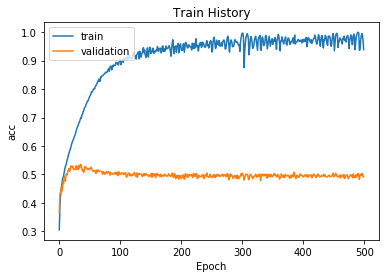

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

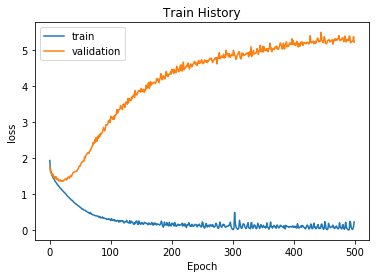

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

## 設定 Optimizer 為 SGD 並觀看學習曲線的走勢

In [13]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=(X_test, y_test,),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 11s - loss: 0.0349 - acc: 0.9890 - val_loss: 5.1730 - val_acc: 0.4977
Epoch 2/500
 - 11s - loss: 0.0103 - acc: 0.9982 - val_loss: 5.1863 - val_acc: 0.5003
Epoch 3/500
 - 11s - loss: 0.0071 - acc: 0.9992 - val_loss: 5.1904 - val_acc: 0.5002
Epoch 4/500
 - 11s - loss: 0.0059 - acc: 0.9995 - val_loss: 5.1939 - val_acc: 0.5011
Epoch 5/500
 - 11s - loss: 0.0053 - acc: 0.9997 - val_loss: 5.2016 - val_acc: 0.5014
Epoch 6/500
 - 12s - loss: 0.0048 - acc: 0.9997 - val_loss: 5.2073 - val_acc: 0.5014
Epoch 7/500
 - 11s - loss: 0.0044 - acc: 0.9998 - val_loss: 5.2148 - val_acc: 0.5008
Epoch 8/500
 - 11s - loss: 0.0042 - acc: 0.9998 - val_loss: 5.2222 - val_acc: 0.5021
Epoch 9/500
 - 11s - loss: 0.0039 - acc: 0.9999 - val_loss: 5.2280 - val_acc: 0.5020
Epoch 10/500
 - 11s - loss: 0.0037 - acc: 0.9998 - val_loss: 5.2318 - val_acc: 0.5022
Epoch 11/500
 - 11s - loss: 0.0036 - acc: 0.9999 - val_loss: 5.2378 - val_acc: 0.5022
Epoch 12/500


Epoch 96/500
 - 10s - loss: 0.0011 - acc: 1.0000 - val_loss: 5.4309 - val_acc: 0.5038
Epoch 97/500
 - 10s - loss: 0.0011 - acc: 1.0000 - val_loss: 5.4323 - val_acc: 0.5040
Epoch 98/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4331 - val_acc: 0.5041
Epoch 99/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4347 - val_acc: 0.5038
Epoch 100/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4357 - val_acc: 0.5035
Epoch 101/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4367 - val_acc: 0.5042
Epoch 102/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4382 - val_acc: 0.5039
Epoch 103/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4394 - val_acc: 0.5040
Epoch 104/500
 - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 5.4408 - val_acc: 0.5039
Epoch 105/500
 - 10s - loss: 9.9851e-04 - acc: 1.0000 - val_loss: 5.4419 - val_acc: 0.5036
Epoch 106/500
 - 10s - loss: 9.9214e-04 - acc: 1.0000 - val_loss: 5.4430 - val_acc: 0.5039
Epoch 107/500
 - 10s - loss: 9.8560e-04

Epoch 187/500
 - 10s - loss: 6.6150e-04 - acc: 1.0000 - val_loss: 5.5181 - val_acc: 0.5043
Epoch 188/500
 - 10s - loss: 6.5884e-04 - acc: 1.0000 - val_loss: 5.5190 - val_acc: 0.5042
Epoch 189/500
 - 10s - loss: 6.5577e-04 - acc: 1.0000 - val_loss: 5.5194 - val_acc: 0.5043
Epoch 190/500
 - 10s - loss: 6.5362e-04 - acc: 1.0000 - val_loss: 5.5206 - val_acc: 0.5041
Epoch 191/500
 - 10s - loss: 6.5099e-04 - acc: 1.0000 - val_loss: 5.5212 - val_acc: 0.5042
Epoch 192/500
 - 10s - loss: 6.4820e-04 - acc: 1.0000 - val_loss: 5.5220 - val_acc: 0.5043
Epoch 193/500
 - 10s - loss: 6.4592e-04 - acc: 1.0000 - val_loss: 5.5224 - val_acc: 0.5041
Epoch 194/500
 - 10s - loss: 6.4348e-04 - acc: 1.0000 - val_loss: 5.5228 - val_acc: 0.5040
Epoch 195/500
 - 10s - loss: 6.4095e-04 - acc: 1.0000 - val_loss: 5.5238 - val_acc: 0.5045
Epoch 196/500
 - 10s - loss: 6.3834e-04 - acc: 1.0000 - val_loss: 5.5251 - val_acc: 0.5041
Epoch 197/500
 - 10s - loss: 6.3594e-04 - acc: 1.0000 - val_loss: 5.5252 - val_acc: 0.5041

 - 10s - loss: 4.8707e-04 - acc: 1.0000 - val_loss: 5.5745 - val_acc: 0.5050
Epoch 278/500
 - 10s - loss: 4.8603e-04 - acc: 1.0000 - val_loss: 5.5754 - val_acc: 0.5043
Epoch 279/500
 - 10s - loss: 4.8428e-04 - acc: 1.0000 - val_loss: 5.5760 - val_acc: 0.5045
Epoch 280/500
 - 10s - loss: 4.8295e-04 - acc: 1.0000 - val_loss: 5.5764 - val_acc: 0.5044
Epoch 281/500
 - 10s - loss: 4.8151e-04 - acc: 1.0000 - val_loss: 5.5771 - val_acc: 0.5046
Epoch 282/500
 - 10s - loss: 4.8025e-04 - acc: 1.0000 - val_loss: 5.5775 - val_acc: 0.5047
Epoch 283/500
 - 10s - loss: 4.7882e-04 - acc: 1.0000 - val_loss: 5.5781 - val_acc: 0.5048
Epoch 284/500
 - 10s - loss: 4.7744e-04 - acc: 1.0000 - val_loss: 5.5785 - val_acc: 0.5047
Epoch 285/500
 - 10s - loss: 4.7601e-04 - acc: 1.0000 - val_loss: 5.5791 - val_acc: 0.5046
Epoch 286/500
 - 10s - loss: 4.7469e-04 - acc: 1.0000 - val_loss: 5.5797 - val_acc: 0.5047
Epoch 287/500
 - 10s - loss: 4.7345e-04 - acc: 1.0000 - val_loss: 5.5801 - val_acc: 0.5046
Epoch 288/500

Epoch 368/500
 - 10s - loss: 3.8566e-04 - acc: 1.0000 - val_loss: 5.6177 - val_acc: 0.5047
Epoch 369/500
 - 10s - loss: 3.8471e-04 - acc: 1.0000 - val_loss: 5.6181 - val_acc: 0.5051
Epoch 370/500
 - 10s - loss: 3.8386e-04 - acc: 1.0000 - val_loss: 5.6185 - val_acc: 0.5053
Epoch 371/500
 - 10s - loss: 3.8301e-04 - acc: 1.0000 - val_loss: 5.6189 - val_acc: 0.5051
Epoch 372/500
 - 10s - loss: 3.8215e-04 - acc: 1.0000 - val_loss: 5.6193 - val_acc: 0.5051
Epoch 373/500
 - 10s - loss: 3.8128e-04 - acc: 1.0000 - val_loss: 5.6197 - val_acc: 0.5052
Epoch 374/500
 - 10s - loss: 3.8030e-04 - acc: 1.0000 - val_loss: 5.6203 - val_acc: 0.5051
Epoch 375/500
 - 10s - loss: 3.7957e-04 - acc: 1.0000 - val_loss: 5.6206 - val_acc: 0.5049
Epoch 376/500
 - 10s - loss: 3.7880e-04 - acc: 1.0000 - val_loss: 5.6209 - val_acc: 0.5051
Epoch 377/500
 - 11s - loss: 3.7792e-04 - acc: 1.0000 - val_loss: 5.6213 - val_acc: 0.5050
Epoch 378/500
 - 11s - loss: 3.7706e-04 - acc: 1.0000 - val_loss: 5.6216 - val_acc: 0.5051

 - 10s - loss: 3.2032e-04 - acc: 1.0000 - val_loss: 5.6513 - val_acc: 0.5045
Epoch 459/500
 - 10s - loss: 3.1976e-04 - acc: 1.0000 - val_loss: 5.6515 - val_acc: 0.5045
Epoch 460/500
 - 10s - loss: 3.1917e-04 - acc: 1.0000 - val_loss: 5.6519 - val_acc: 0.5045
Epoch 461/500
 - 10s - loss: 3.1852e-04 - acc: 1.0000 - val_loss: 5.6524 - val_acc: 0.5046
Epoch 462/500
 - 10s - loss: 3.1802e-04 - acc: 1.0000 - val_loss: 5.6525 - val_acc: 0.5046
Epoch 463/500
 - 10s - loss: 3.1737e-04 - acc: 1.0000 - val_loss: 5.6527 - val_acc: 0.5048
Epoch 464/500
 - 10s - loss: 3.1681e-04 - acc: 1.0000 - val_loss: 5.6531 - val_acc: 0.5047
Epoch 465/500
 - 10s - loss: 3.1605e-04 - acc: 1.0000 - val_loss: 5.6536 - val_acc: 0.5048
Epoch 466/500
 - 10s - loss: 3.1570e-04 - acc: 1.0000 - val_loss: 5.6537 - val_acc: 0.5046
Epoch 467/500
 - 10s - loss: 3.1502e-04 - acc: 1.0000 - val_loss: 5.6541 - val_acc: 0.5045
Epoch 468/500
 - 10s - loss: 3.1449e-04 - acc: 1.0000 - val_loss: 5.6544 - val_acc: 0.5047
Epoch 469/500

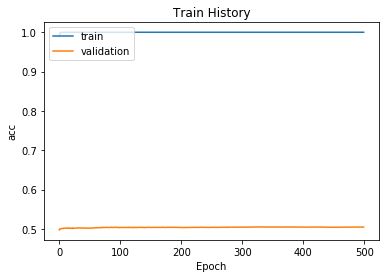

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

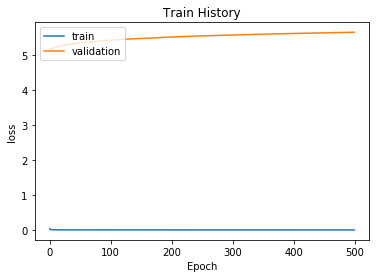

In [16]:
show_train_history(train_history, 'loss', 'val_loss')